In [1]:
import copy
import adcc
import matplotlib.pyplot as plt
import numpy as np
import veloxchem as vlx

au2ev = 27.211386

/Users/golo.dusanka/miniconda3/envs/echem/lib/python3.12/site-packages/adcc/misc.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [2]:
def lorentzian(x, y, xmin, xmax, xstep, gamma):
    """
    Lorentzian broadening function

    Call: xi,yi = lorentzian(energies, intensities, start energy,
                                    end energy, energy step, gamma)
    """
    xi = np.arange(xmin, xmax, xstep)
    yi = np.zeros(len(xi))
    for i in range(len(xi)):
        for k in range(len(x)):
            yi[i] = (
                yi[i]
                + y[k] * gamma / ((xi[i] - x[k]) ** 2 + (gamma / 2.0) ** 2) / np.pi
            )
    return xi, yi

In [3]:
water_xyz = """3

O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

water_fluorine_xyz = """3

F       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""

In [4]:
import py3Dmol as p3d
viewer = p3d.view(viewergrid=(1, 2), width=500, height=200)
viewer.addModel(water_xyz, 'xyz', viewer=(0, 0))
viewer.addModel(water_fluorine_xyz, 'xyz', viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick":{},"sphere": {"scale":0.25}})
viewer.rotate(-90,'x')
viewer.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
molecule = vlx.Molecule.read_xyz_string(water_xyz)
basis = vlx.MolecularBasis.read(molecule, "CC-PCVDZ")

# Perform SCF calculation
scf_gs = vlx.ScfRestrictedDriver()
gs_results = scf_gs.compute(molecule, basis)

molecule.set_charge(1)
molecule.set_multiplicity(2)

scf_ion = vlx.ScfUnrestrictedDriver()

#Create list of occupied orbitals
occa = list(range(5))
occb = list(range(1, 5))
scf_ion.maximum_overlap(molecule, basis, scf_gs.mol_orbs, occa, occb)
ion_results = scf_ion.compute(molecule, basis)

molecule_F = vlx.Molecule.read_xyz_string(water_fluorine_xyz)
molecule_F.set_charge(1)
basis_F = vlx.MolecularBasis.read(molecule_F, "CC-PCVDZ")

scf_F = vlx.ScfRestrictedDriver()
F_results = scf_F.compute(molecule_F, basis_F)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.980954854746 a.u. Time: 0.07 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -76.025912394461    0.0000000000      0.10613691      0.01096404      0.00000000                


                  2       -76.026931952439   -0.0010195580      0.02019241      0.00280757      0.02550308                


                  3       -76.026976262238   -0.0000443098      0.00419173      0.00085956      0.00453733                


                  4       -76.026979226222   -0.0000029640      0.00218984      0.00030105      0.00163383                


                  5       -76.026979655187   -0.0000004290      0.00033786      0.00007031      0.00046129                


                  6       -76.026979678134   -0.0000000229      0.00003955      0.00000573      0.00016589                


                  7       -76.026979678489   -0.0000000004      0.00000246      0.00000041      0.00002137                


                  8       -76.026979678490   -0.0000000000      0.00000049      0.00000007      0.00000086                


                                                                                                                          
               *** SCF converged in 8 iterations. Time: 0.30 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -76.0269796785 a.u.                                              
               Electronic Energy                  :      -85.1831243979 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000004877 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.812127 a.u.        -2.064221 Debye                                     
                                 Total :         0.812127 a.u.         2.064221 Debye                                     
                

* Info * Checkpoint written to file: vlx_20251124_50ebdd4e_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                   Max. Number of Iterations       : 50                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -55.476698768014    0.0000000000      4.00725477      1.00603661      0.00000000                


                  2       -56.031465126004   -0.5547663580      1.49516221      0.19142953      0.85523582                


                  3       -56.177378495754   -0.1459133698      0.20617595      0.03128268      0.33481131                


                  4       -56.180651358574   -0.0032728628      0.03175806      0.00523624      0.05436888                


                  5       -56.180957941862   -0.0003065833      0.01110568      0.00195632      0.01691272                


                  6       -56.181002534103   -0.0000445922      0.00267353      0.00047453      0.00810046                


                  7       -56.181004700115   -0.0000021660      0.00061110      0.00007448      0.00172878                


                  8       -56.181004792916   -0.0000000928      0.00009944      0.00001508      0.00036532                


                  9       -56.181004794731   -0.0000000018      0.00001782      0.00000370      0.00005401                


                 10       -56.181004794796   -0.0000000001      0.00000300      0.00000068      0.00000901                


                 11       -56.181004794798   -0.0000000000      0.00000076      0.00000011      0.00000154                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_50ebdd4e_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 11 iterations. Time: 1.02 sec.                                                        
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -56.1810047948 a.u.                                              
               Electronic Energy                  :      -65.3371495142 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000007610 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -100.158367337683 a.u. Time: 0.07 sec.                                 
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1      -100.214024504399    0.0000000000      0.12359661      0.01239920      0.00000000                


                  2      -100.215043508877   -0.0010190045      0.02145899      0.00253837      0.02493401                


                  3      -100.215077276736   -0.0000337679      0.00519535      0.00113956      0.00397286                


                  4      -100.215079688343   -0.0000024116      0.00288091      0.00043628      0.00130322                


                  5      -100.215080313014   -0.0000006247      0.00030532      0.00006180      0.00049213                


                  6      -100.215080331861   -0.0000000188      0.00003394      0.00000501      0.00011963                


                  7      -100.215080332084   -0.0000000002      0.00000490      0.00000078      0.00001219                


                  8      -100.215080332090   -0.0000000000      0.00000093      0.00000012      0.00000208                


                                                                                                                          
               *** SCF converged in 8 iterations. Time: 0.42 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :     -100.2150803321 a.u.                                              
               Electronic Energy                  :     -110.4722009532 a.u.                                              
               Nuclear Repulsion Energy           :       10.2571206211 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000009255 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                

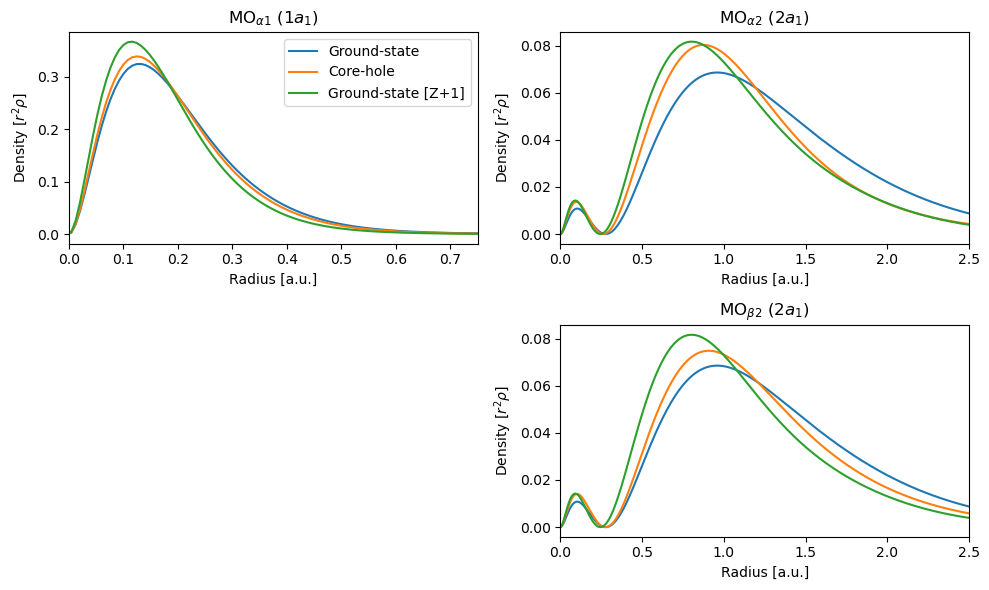

In [6]:
def get_rho(coords, mo1, mo2, mo3):
    r, rho1, rho2, rho3 = [], [], [], []
    for i in np.arange(len(coords)):
        r.append(coords[i, 0])
        rho1.append(coords[i, 0] ** 2 * mo1[i] ** 2)
        rho2.append(coords[i, 0] ** 2 * mo2[i] ** 2)
        rho3.append(coords[i, 0] ** 2 * mo3[i] ** 2)
    return r, rho1, rho2, rho3

vis_drv = vlx.VisualizationDriver()

Ay = 0.0  # oxygen y-position (in au)
Az = 0.1178336003 / 0.529177249  # oxygen z-position (in au)

# Create coordinate object along x-axis (intersecting with O/F atom)
n = 1000
coords = np.zeros((n, 3))
coords[:, 0] = np.linspace(-4, 4, n)  # radial points along the x-axis
coords[:, 2] = Az

mo1_gs = np.array(vis_drv.get_mo(coords, molecule, basis, scf_gs.mol_orbs.alpha_to_numpy(), 0))
mo1_ion = np.array(vis_drv.get_mo(coords, molecule, basis, scf_ion.mol_orbs.alpha_to_numpy(), 0))
mo1_Z1 = np.array(vis_drv.get_mo(coords, molecule_F, basis_F, scf_F.mol_orbs.alpha_to_numpy(), 0))

plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title(r"MO$_{\alpha 1}$ ($1a_1$)")
r, rho1, rho2, rho3 = get_rho(coords, mo1_gs, mo1_ion, mo1_Z1)
plt.plot(r, rho1)
plt.plot(r, rho2)
plt.plot(r, rho3)
plt.legend(("Ground-state", "Core-hole", "Ground-state [Z+1]"))
plt.xlim((0, 0.75))
plt.xlabel("Radius [a.u.]")
plt.ylabel(r"Density [$r^2 \rho$]")

mo2_gs = np.array(vis_drv.get_mo(coords, molecule, basis, scf_gs.mol_orbs.alpha_to_numpy(), 1))
mo2_ion = np.array(vis_drv.get_mo(coords, molecule, basis, scf_ion.mol_orbs.alpha_to_numpy(), 1))
mo2_Z1 = np.array(vis_drv.get_mo(coords, molecule_F, basis_F, scf_F.mol_orbs.alpha_to_numpy(), 1))

plt.subplot(222)
plt.title(r"MO$_{\alpha 2}$ ($2a_1$)")
r, rho1, rho2, rho3 = get_rho(coords, mo2_gs, mo2_ion, mo2_Z1)
plt.plot(r, rho1)
plt.plot(r, rho2)
plt.plot(r, rho3)
plt.xlim((0, 2.5))
plt.xlabel("Radius [a.u.]")
plt.ylabel(r"Density [$r^2 \rho$]")

mo2b_gs = np.array(vis_drv.get_mo(coords, molecule, basis, scf_gs.mol_orbs.beta_to_numpy(), 1))
mo2b_ion = np.array(vis_drv.get_mo(coords, molecule, basis, scf_ion.mol_orbs.beta_to_numpy(), 0))
mo2b_Z1 = np.array(vis_drv.get_mo(coords, molecule_F, basis_F, scf_F.mol_orbs.beta_to_numpy(), 1))

plt.subplot(224)
plt.title(r"MO$_{\beta 2}$ ($2a_1$)")
r, rho1, rho2, rho3 = get_rho(coords, mo2b_gs, mo2b_ion, mo2b_Z1)
plt.plot(r, rho1)
plt.plot(r, rho2)
plt.plot(r, rho3)
plt.xlim((0, 2.5))
plt.xlabel("Radius [a.u.]")
plt.ylabel(r"Density [$r^2 \rho$]")

plt.tight_layout()
plt.show()

In [7]:
methane_mol_str = """
C       0.0000000000     0.0000000000     0.0000000000
H       0.6265918120     0.6265918120     0.6265918120
H      -0.6265918120    -0.6265918120     0.6265918120
H      -0.6265918120     0.6265918120    -0.6265918120
H       0.6265918120    -0.6265918120    -0.6265918120
"""
ammonia_mol_str = """
N       0.0000000000     0.0000000000     0.1175868000
H       0.9323800000     0.0000000000    -0.2743692000
H      -0.4661900000    -0.8074647660    -0.2743692000
H      -0.4661900000     0.8074647660    -0.2743692000
"""
water_mol_str = """
O       0.0000000000     0.0000000000     0.1178336003
H      -0.7595754146    -0.0000000000    -0.4713344012
H       0.7595754146     0.0000000000    -0.4713344012
"""
hydrofluoride_mol_str = """
H       0.0000000000     0.0000000000    -0.8261856000
F       0.0000000000     0.0000000000     0.0917984000
"""
neon_mol_str = """
Ne      0.0000000000     0.0000000000     0.0000000000
"""


def Koopman_vs_delta(mol_str, basis_label):
    
    molecule = vlx.Molecule.read_molecule_string(mol_str)
    basis = vlx.MolecularBasis.read(molecule, basis_label)

    # Perform SCF calculation
    scf_gs = vlx.ScfRestrictedDriver()
    gs_results = scf_gs.compute(molecule, basis)
    
    orbital_energies = gs_results["E_alpha"]

    molecule.set_charge(1)
    molecule.set_multiplicity(2)
    scf_ion = vlx.ScfUnrestrictedDriver()

    #Create list of occupied orbitals
    nOcc = molecule.number_of_alpha_electrons()
    occa = list(range(nOcc))
    occb = list(range(1, nOcc))
    scf_ion.maximum_overlap(molecule, basis, scf_gs.mol_orbs, occa, occb)
    ion_results = scf_ion.compute(molecule, basis)


    # Return MO energy and deltaSCF
    return -au2ev * orbital_energies[0], au2ev * (
        scf_ion.get_scf_energy() - scf_gs.get_scf_energy()
    )


# Basis set and container for errors
basis = "cc-pcvdz"
err_koopman, err_delta = [], []

expt, rel = 290.76, 0.11  # experimental IE and scalar-relativistic effects
E_Koopman, E_delta = Koopman_vs_delta(methane_mol_str, basis)
err_koopman.append(E_Koopman + rel - expt)
err_delta.append(E_delta + rel - expt)

expt, rel = 405.52, 0.21  # experimental IE and scalar-relativistic effects
E_Koopman, E_delta = Koopman_vs_delta(ammonia_mol_str, basis)
err_koopman.append(E_Koopman + rel - expt)
err_delta.append(E_delta + rel - expt)

expt, rel = 539.90, 0.37  # experimental IE and scalar-relativistic effects
E_Koopman, E_delta = Koopman_vs_delta(water_mol_str, basis)
err_koopman.append(E_Koopman + rel - expt)
err_delta.append(E_delta + rel - expt)

expt, rel = 694.10, 0.61  # experimental IE and scalar-relativistic effects
E_Koopman, E_delta = Koopman_vs_delta(hydrofluoride_mol_str, basis)
err_koopman.append(E_Koopman + rel - expt)
err_delta.append(E_delta + rel - expt)

expt, rel = 870.09, 0.94  # experimental IE and scalar-relativistic effects
E_Koopman, E_delta = Koopman_vs_delta(neon_mol_str, basis)
err_koopman.append(E_Koopman + rel - expt)
err_delta.append(E_delta + rel - expt)

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -40.176641252708 a.u. Time: 0.10 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -40.198632549790    0.0000000000      0.07238664      0.00936881      0.00000000                


                  2       -40.199216137990   -0.0005835882      0.00782091      0.00096258      0.02494254                


                  3       -40.199223311013   -0.0000071730      0.00284629      0.00037032      0.00277747                


                  4       -40.199224544997   -0.0000012340      0.00033787      0.00005254      0.00101091                


                  5       -40.199224580341   -0.0000000353      0.00002279      0.00000407      0.00032567                


                  6       -40.199224580473   -0.0000000001      0.00000241      0.00000058      0.00002005                


                  7       -40.199224580475   -0.0000000000      0.00000024      0.00000006      0.00000128                


                                                                                                                          
               *** SCF converged in 7 iterations. Time: 0.38 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -40.1992245805 a.u.                                              
               Electronic Energy                  :      -53.6929357092 a.u.                                              
               Nuclear Repulsion Energy           :       13.4937111288 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000002419 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_31900942_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -28.984548233126    0.0000000000      2.72929056      0.75211056      0.00000000                


                  2       -29.383245222949   -0.3986969898      1.03746343      0.14598216      0.84846701                


                  3       -29.480740305899   -0.0974950829      0.17120996      0.02756281      0.34603159                


                  4       -29.484157355961   -0.0034170501      0.03303526      0.00415502      0.06446845                


                  5       -29.484720018471   -0.0005626625      0.01405409      0.00153921      0.02807396                


                  6       -29.484843881109   -0.0001238626      0.00254185      0.00037584      0.01842700                


                  7       -29.484845836451   -0.0000019553      0.00046743      0.00007510      0.00338992                


                  8       -29.484845893262   -0.0000000568      0.00008456      0.00000995      0.00035811                


                  9       -29.484845895285   -0.0000000020      0.00001190      0.00000161      0.00007186                


                 10       -29.484845895330   -0.0000000000      0.00000170      0.00000025      0.00001234                


                 11       -29.484845895330   -0.0000000000      0.00000013      0.00000002      0.00000111                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_31900942_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 11 iterations. Time: 1.40 sec.                                                        
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -29.4848458953 a.u.                                              
               Electronic Energy                  :      -42.9785570241 a.u.                                              
               Nuclear Repulsion Energy           :       13.4937111288 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001275 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -56.154702188708 a.u. Time: 0.09 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -56.195358785586    0.0000000000      0.09236701      0.01092262      0.00000000                


                  2       -56.196206735532   -0.0008479499      0.01551902      0.00289180      0.03204290                


                  3       -56.196232682551   -0.0000259470      0.00329250      0.00061368      0.00416037                


                  4       -56.196236230580   -0.0000035480      0.00129802      0.00014764      0.00241244                


                  5       -56.196236654350   -0.0000004238      0.00047049      0.00009292      0.00079374                


                  6       -56.196236728370   -0.0000000740      0.00006997      0.00001054      0.00047731                


                  7       -56.196236729650   -0.0000000013      0.00000421      0.00000053      0.00006073                


                  8       -56.196236729653   -0.0000000000      0.00000048      0.00000006      0.00000255                


                                                                                                                          
               *** SCF converged in 8 iterations. Time: 0.35 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -56.1962367297 a.u.                                              
               Electronic Energy                  :      -68.1665637711 a.u.                                              
               Nuclear Repulsion Energy           :       11.9703270415 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000004806 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Z   :        -0.681083 a.u.        -1.731140 Debye                                     
                                 Total :         0.681083 a.u.         1.731140 Debye                                     
                

                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_da42903c_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -40.660410101572    0.0000000000      3.36296681      0.93787381      0.00000000                


                  2       -41.122191658113   -0.4617815565      1.36758506      0.19392095      0.86529171                


                  3       -41.266669310780   -0.1444776527      0.21528914      0.02793667      0.35551128                


                  4       -41.271020414677   -0.0043511039      0.03449561      0.00531354      0.06580037                


                  5       -41.271483608593   -0.0004631939      0.01412355      0.00223336      0.02171266                


                  6       -41.271579300234   -0.0000956916      0.00321463      0.00044586      0.01358060                


                  7       -41.271582780015   -0.0000034798      0.00076046      0.00010369      0.00252762                


                  8       -41.271582946469   -0.0000001665      0.00015419      0.00002015      0.00053815                


                  9       -41.271582952575   -0.0000000061      0.00003472      0.00000430      0.00011550                


                 10       -41.271582952900   -0.0000000003      0.00000726      0.00000138      0.00002156                


                 11       -41.271582952917   -0.0000000000      0.00000201      0.00000041      0.00000518                


                 12       -41.271582952918   -0.0000000000      0.00000036      0.00000006      0.00000170                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_da42903c_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 12 iterations. Time: 1.23 sec.                                                        
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -41.2715829529 a.u.                                              
               Electronic Energy                  :      -53.2419099944 a.u.                                              
               Nuclear Repulsion Energy           :       11.9703270415 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000003577 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -75.980954854746 a.u. Time: 0.08 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.01 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.01 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -76.025912394461    0.0000000000      0.10613691      0.01096404      0.00000000                


                  2       -76.026931952439   -0.0010195580      0.02019241      0.00280757      0.02550308                


                  3       -76.026976262238   -0.0000443098      0.00419173      0.00085956      0.00453733                


                  4       -76.026979226222   -0.0000029640      0.00218984      0.00030105      0.00163383                


                  5       -76.026979655187   -0.0000004290      0.00033786      0.00007031      0.00046129                


                  6       -76.026979678134   -0.0000000229      0.00003955      0.00000573      0.00016589                


                  7       -76.026979678489   -0.0000000004      0.00000246      0.00000041      0.00002137                


                  8       -76.026979678490   -0.0000000000      0.00000049      0.00000007      0.00000086                


                                                                                                                          
               *** SCF converged in 8 iterations. Time: 0.30 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :      -76.0269796785 a.u.                                              
               Electronic Energy                  :      -85.1831243979 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000004877 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.812127 a.u.        -2.064221 Debye                                     
                                 Total :         0.812127 a.u.         2.064221 Debye                                     
                

                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_24868e25_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -55.476698768014    0.0000000000      4.00725477      1.00603661      0.00000000                


                  2       -56.031465126004   -0.5547663580      1.49516221      0.19142953      0.85523582                


                  3       -56.177378495754   -0.1459133698      0.20617595      0.03128268      0.33481131                


                  4       -56.180651358574   -0.0032728628      0.03175806      0.00523624      0.05436888                


                  5       -56.180957941862   -0.0003065833      0.01110568      0.00195632      0.01691272                


                  6       -56.181002534103   -0.0000445922      0.00267353      0.00047453      0.00810046                


                  7       -56.181004700115   -0.0000021660      0.00061110      0.00007448      0.00172878                


                  8       -56.181004792916   -0.0000000928      0.00009944      0.00001508      0.00036532                


                  9       -56.181004794731   -0.0000000018      0.00001782      0.00000370      0.00005401                


                 10       -56.181004794796   -0.0000000001      0.00000300      0.00000068      0.00000901                


                 11       -56.181004794798   -0.0000000000      0.00000076      0.00000011      0.00000154                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_24868e25_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 11 iterations. Time: 0.93 sec.                                                        
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -56.1810047948 a.u.                                              
               Electronic Energy                  :      -65.3371495142 a.u.                                              
               Nuclear Repulsion Energy           :        9.1561447194 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000007610 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -99.988874777753 a.u. Time: 0.06 sec.                                  
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1      -100.018768000114    0.0000000000      0.09773637      0.01303368      0.00000000                


                  2      -100.019585862255   -0.0008178621      0.02190606      0.00305029      0.02171836                


                  3      -100.019640824607   -0.0000549624      0.00566262      0.00116714      0.00487750                


                  4      -100.019645492095   -0.0000046675      0.00331753      0.00040559      0.00201343                


                  5      -100.019646381262   -0.0000008892      0.00037277      0.00005411      0.00064692                


                  6      -100.019646410026   -0.0000000288      0.00003872      0.00000711      0.00017580                


                  7      -100.019646410326   -0.0000000003      0.00000210      0.00000036      0.00001858                


                  8      -100.019646410327   -0.0000000000      0.00000019      0.00000003      0.00000071                


               *** SCF converged in 8 iterations. Time: 0.26 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :     -100.0196464103 a.u.                                              
               Electronic Energy                  :     -105.2077487064 a.u.                                              
               Nuclear Repulsion Energy           :        5.1881022960 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000001942 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.768372 a.u.        -1.953007 Debye                                     
                                 Total :         0.768372 a.u.         1.953007 Debye                                     
                

                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_629cc4c8_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -73.742490771103    0.0000000000      4.65394692      1.19371628      0.00000000                


                  2       -74.398937627258   -0.6564468562      1.45174136      0.15266049      0.80606973                


                  3       -74.507809858140   -0.1088722309      0.15003366      0.02152883      0.27290087                


                  4       -74.509195127826   -0.0013852697      0.02481321      0.00345443      0.03446813                


                  5       -74.509328657671   -0.0001335298      0.00650857      0.00110570      0.01088816                


                  6       -74.509339136024   -0.0000104784      0.00159980      0.00028573      0.00336728                


                  7       -74.509339787445   -0.0000006514      0.00032453      0.00004058      0.00089691                


                  8       -74.509339810128   -0.0000000227      0.00004148      0.00000612      0.00018196                


                  9       -74.509339810308   -0.0000000002      0.00000481      0.00000071      0.00001225                


                 10       -74.509339810311   -0.0000000000      0.00000052      0.00000010      0.00000206                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_629cc4c8_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 10 iterations. Time: 0.65 sec.                                                        
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -74.5093398103 a.u.                                              
               Electronic Energy                  :      -79.6974421063 a.u.                                              
               Nuclear Repulsion Energy           :        5.1881022960 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000005166 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Starting Reduced Basis SCF calculation...                                                                        
* Info * ...done. SCF energy in reduced basis set: -128.488925926667 a.u. Time: 0.02 sec.                                 
                                                                                                                          


* Info * Overlap matrix computed in 0.00 sec.                                                                             
                                                                                                                          
* Info * Kinetic energy matrix computed in 0.00 sec.                                                                      
                                                                                                                          
* Info * Nuclear potential matrix computed in 0.00 sec.                                                                   
                                                                                                                          


* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1      -128.488925929027    0.0000000000      0.00008363      0.00002132      0.00000000                


                  2      -128.488925929352   -0.0000000003      0.00001743      0.00000273      0.00001389                


                  3      -128.488925929371   -0.0000000000      0.00000043      0.00000014      0.00000294                


                                                                                                                          
               *** SCF converged in 3 iterations. Time: 0.07 sec.                                                         
                                                                                                                          


               Spin-Restricted Hartree-Fock:                                                                              
               -----------------------------                                                                              
               Total Energy                       :     -128.4889259294 a.u.                                              
               Electronic Energy                  :     -128.4889259294 a.u.                                              
               Nuclear Repulsion Energy           :        0.0000000000 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000004282 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                                   Y   :         0.000000 a.u.         0.000000 Debye                                     
                                   Z   :        -0.000000 a.u.        -0.000000 Debye                                     
                                 Total :         0.000000 a.u.         0.000000 Debye                                     
                

                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_3b82931b_scf.h5                                                         
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Unrestricted Hartree-Fock                                       
                   Initial Guess Model             : Restart from Checkpoint                                              
                   Convergence Accelerator         : Direct Inversion of Iterative Subspace                               
                

* Info * Orthogonalization matrix computed in 0.00 sec.                                                                   
                                                                                                                          


                                                                                                                          
               Iter. | Hartree-Fock Energy | Energy Change | Gradient Norm | Max. Gradient | Density Change               
               --------------------------------------------------------------------------------------------               
                  1       -95.724739415048    0.0000000000      5.28148132      1.26602289      0.00000000                


                  2       -96.447251770785   -0.7225123557      1.28775994      0.20942739      0.73277939                


                  3       -96.508840201458   -0.0615884307      0.08798008      0.01988639      0.19104619                


                  4       -96.509196421834   -0.0003562204      0.01626179      0.00327620      0.01701992                


                  5       -96.509231483789   -0.0000350620      0.00285999      0.00052555      0.00566536                


                  6       -96.509232485076   -0.0000010013      0.00010250      0.00003847      0.00110714                


                  7       -96.509232486360   -0.0000000013      0.00001338      0.00000395      0.00004150                


                  8       -96.509232486370   -0.0000000000      0.00000063      0.00000011      0.00000278                


                                                                                                                          
* Info * Checkpoint written to file: vlx_20251124_3b82931b_scf.h5                                                         
                                                                                                                          
               *** SCF converged in 8 iterations. Time: 0.36 sec.                                                         
                                                                                                                          


               Spin-Unrestricted Hartree-Fock:                                                                            
               -------------------------------                                                                            
               Total Energy                       :      -96.5092324864 a.u.                                              
               Electronic Energy                  :      -96.5092324864 a.u.                                              
               Nuclear Repulsion Energy           :        0.0000000000 a.u.                                              
               ------------------------------------                                                                       
               Gradient Norm                      :        0.0000006335 a.u.                                              
                                                                                                                          
                

                                                                                                                          
                                                Ground State Dipole Moment                                                
                                               ----------------------------                                               
                                 *** Warning: Molecule has non-zero charge. Dipole                                        
                                     moment will be dependent on the choice of origin.                                    
                                     Center of nuclear charge is chosen as the origin.                                    
                                                                                                                          
                                   X   :        -0.000000 a.u.        -0.000000 Debye                                     
                

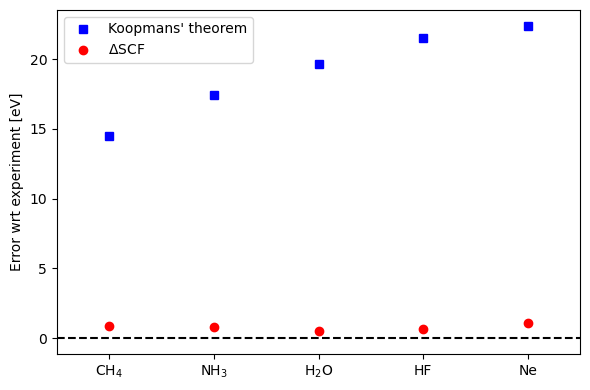

In [8]:
plt.figure(figsize=(6, 4))
# Plot error from MO energies and delta-SCF
plt.plot([1, 2, 3, 4, 5], err_koopman, "bs")
plt.plot([1, 2, 3, 4, 5], err_delta, "ro")
plt.plot([0.5, 5.5], [0, 0], "k--", zorder=0)

plt.legend(("Koopmans' theorem", r"$\Delta$SCF"))
plt.ylabel("Error wrt experiment [eV]")
plt.xticks([1, 2, 3, 4, 5], (r"CH$_4$", r"NH$_3$", r"H$_2$O", "HF", "Ne"))
plt.xlim((0.5, 5.5))
plt.tight_layout()
plt.show()